# Business Case: Prepare the Model to predict the ordinal variable damage_grade(target variables-y), which represents a level of damage to the building that was hit by the earthquake, from given features(x).

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

Task3:- Suggestions to the Seismologists to avoid  earthquake event leading  to significant damage in many buildings


In [153]:
# import important Libraries

In [154]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


In [155]:
train_values=pd.read_csv('train_values.csv') # read and load independant/ feature variables

In [156]:
train_values

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [157]:
train_labels=pd.read_csv('train_labels.csv') # read and load target variables

In [158]:
train_labels

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3
...,...,...
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2


In [159]:
train_labels.drop('building_id', axis=1, inplace=True)

In [160]:
train_labels

,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


In [161]:
data=pd.concat([train_values, train_labels], axis=1) # concate independant and target variables

In [162]:
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


In [163]:
data.head(pd.set_option('display.max_columns',None)) # all columns of dataset

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


# Domain Analysis:

#### **There is not one magnitude above which damage will occur. It depends on other variables, such as the distance from the earthquake, what type of soil you are on, building construction etc.**

### Features:-
##### * The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

##### * There are 39 columns in this dataset, where the building_id column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

### *Features Description:*
* geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists,from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
* count_floors_pre_eq (type: int): number of floors in the building before the earthquake.
* age (type: int): age of the building in years.
* area_percentage (type: int): normalized area of the building footprint.
* height_percentage (type: int): normalized height of the building footprint.
* land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
* foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
* roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.
* ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z
* other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
* position (type: categorical): position of the building. Possible values: j, o, s, t.
* plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
* has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
* has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.
* has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
* has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.
* has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
* has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete
* has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* 	has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material
* legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
* count_families (type: int): number of families that live in the building.
* has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.
* has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.
* has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.
* has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.
* has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.
* has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.
* has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.
* has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.
* has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.
* has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.
* has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.her purposes.


## Basic checks 

In [164]:
data.head() # first 5 rows of data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [165]:
data.tail() # last 5 rows of data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0,3


In [166]:
data.info() # info() provide information about dataset like total no. of column and rows, null values, datatypes, memory usages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [167]:
data.isnull().sum() #tatal null values present on dataset

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [168]:
# there is no null values present in given dataset

In [169]:
data.describe() # this method is used for statistical analysis like mean(average), standard deviation, total counts, min ans max.

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [170]:
# building id is unique value column that we can drop from dataset further.
# mean gives the average  value of that column 
# min and max gives the minimun and maximum values of that particular column respectively
# standard deviation gives how far the data is from its mean value

In [171]:
data.describe(include='O') # statistical analysis for objective columns

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status
count,260601,260601,260601,260601,260601,260601,260601,260601
unique,3,5,3,5,4,4,10,4
top,t,r,n,f,q,s,d,v
freq,216757,219196,182842,209619,165282,202090,250072,250939


In [172]:
# count gives total no. of values 
# unique represent how many unique values present in that perticular columns
# freq gives the max. unique value

In [173]:
# list of all numerical columns and its unique values and value counts

num_data=data.select_dtypes(int)
for i in num_data:
    print(i, data[i].unique())
    print(data[i].value_counts())
    print('****************************************')

building_id [802906  28830  94947 ... 602512 151409 747594]
building_id
802906    1
680296    1
802531    1
544902    1
823257    1
         ..
69364     1
735154    1
828266    1
513344    1
747594    1
Name: count, Length: 260601, dtype: int64
****************************************
geo_level_1_id [ 6  8 21 22 11  9 20  0 26 17 12 18  4 27 25 10  7  3 13 30 16  5 15 14
 19  1 24 28 23  2 29]
geo_level_1_id
6     24381
26    22615
10    22079
17    21813
8     19080
7     18994
20    17216
21    14889
4     14568
27    12532
13     9608
11     8220
3      7540
22     6252
25     5624
16     4332
0      4011
9      3958
12     3194
18     3189
1      2701
5      2690
30     2686
15     2320
14     1714
24     1310
23     1121
2       931
29      396
19      372
28      265
Name: count, dtype: int64
****************************************
geo_level_2_id [487 900 363 ...  77 115 627]
geo_level_2_id
39      4038
158     2520
181     2080
1387    2040
157     1897
        ... 
1330      

In [174]:
# list of all catagorical columns and its unique values and value counts
cat_data=data.select_dtypes(include=['O'])

for i in cat_data:
    print(i, data[i].unique())
    print(data[i].value_counts())
    print('************************************************')

land_surface_condition ['t' 'o' 'n']
land_surface_condition
t    216757
n     35528
o      8316
Name: count, dtype: int64
************************************************
foundation_type ['r' 'w' 'i' 'u' 'h']
foundation_type
r    219196
w     15118
u     14260
i     10579
h      1448
Name: count, dtype: int64
************************************************
roof_type ['n' 'q' 'x']
roof_type
n    182842
q     61576
x     16183
Name: count, dtype: int64
************************************************
ground_floor_type ['f' 'x' 'v' 'z' 'm']
ground_floor_type
f    209619
x     24877
v     24593
z      1004
m       508
Name: count, dtype: int64
************************************************
other_floor_type ['q' 'x' 'j' 's']
other_floor_type
q    165282
x     43448
j     39843
s     12028
Name: count, dtype: int64
************************************************
position ['t' 's' 'j' 'o']
position
s    202090
t     42896
j     13282
o      2333
Name: count, dtype: int64
*****************

## Data Encoding

In [100]:
data.land_surface_condition=data.land_surface_condition.map({'t':2, 'n':1, 'o':0})

In [101]:
data.foundation_type=data.foundation_type.map({'r':4, 'w':3, 'u':2, 'i':1, 'h':0})

In [102]:
data.roof_type=data.roof_type.map({'n':2, 'q':1, 'x':0})

In [103]:
data.ground_floor_type=data.ground_floor_type.map({'f':4, 'x':3, 'v':2, 'z':1, 'm':0})

In [104]:
data.other_floor_type=data.other_floor_type.map({'q':3, 'x':2, 'j':1, 's':0})

In [105]:
data.position=data.position.map({'s':3, 't':2, 'j':1, 'o':0})

In [106]:
data.plan_configuration=data.plan_configuration.map({'d':9, 'q':8, 'u':7, 's':6, 'c':5, 'a':4, 'o':3, 'm':2, 'n':1, 'f':0})

In [107]:
data.legal_ownership_status=data.legal_ownership_status.map({'v':3, 'a':2, 'w':1, 'r':0})

In [108]:
data.drop('building_id', axis=1, inplace=True)

In [109]:
data

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,6,487,12198,2,30,6,5,2,4,2,4,3,2,9,1,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,0,4,2,3,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,2,4,2,4,2,2,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,2,4,2,4,2,3,9,0,1,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
4,11,131,1488,3,30,8,9,2,4,2,4,2,3,9,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,1,4,2,4,1,3,8,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,17,715,2060,2,0,6,5,2,4,2,4,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,17,51,8163,3,55,6,7,2,4,1,4,3,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,26,39,1851,2,10,14,6,2,4,0,2,0,1,9,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2


## EDA- Exploratory Data Analysis

### Univariate

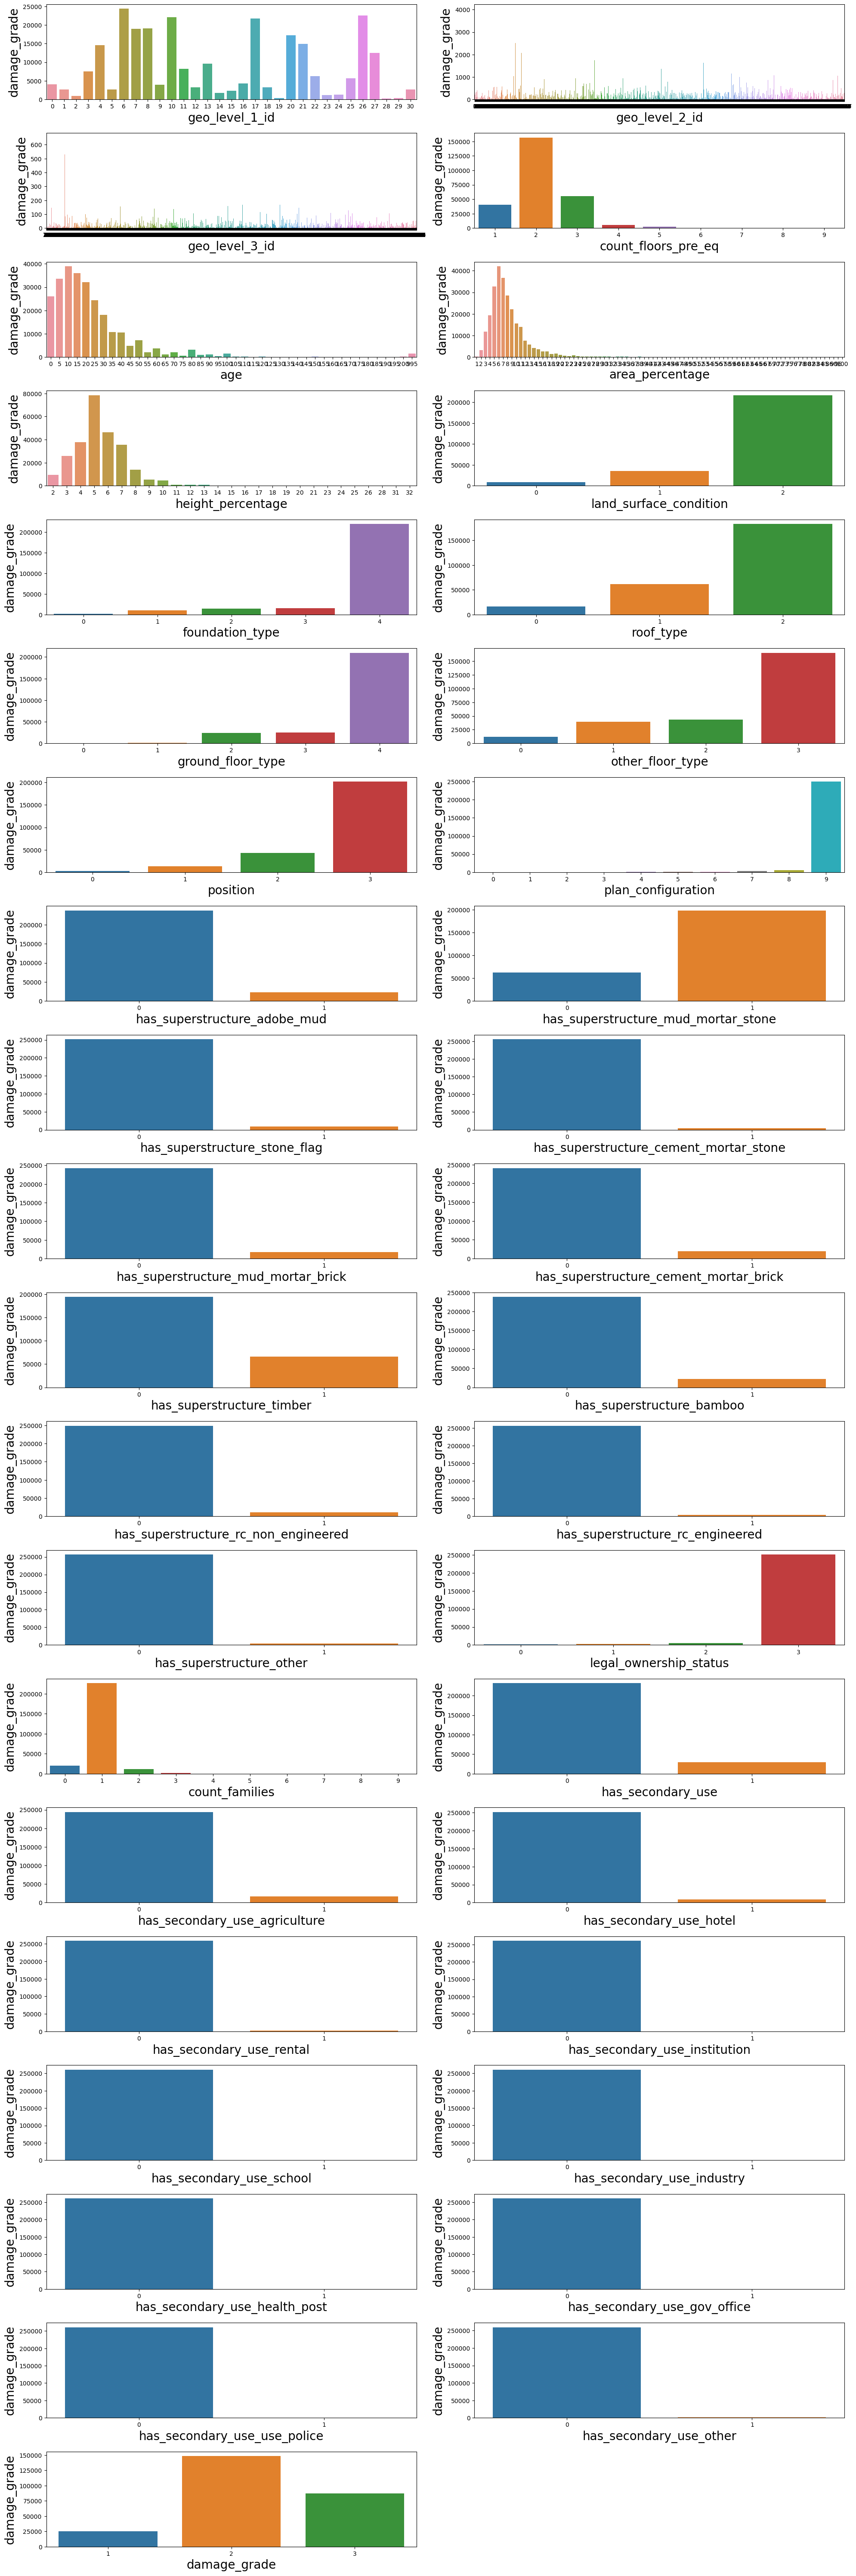

In [229]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=40:
        ax=plt.subplot(20,2,plotnumber)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Bivariate

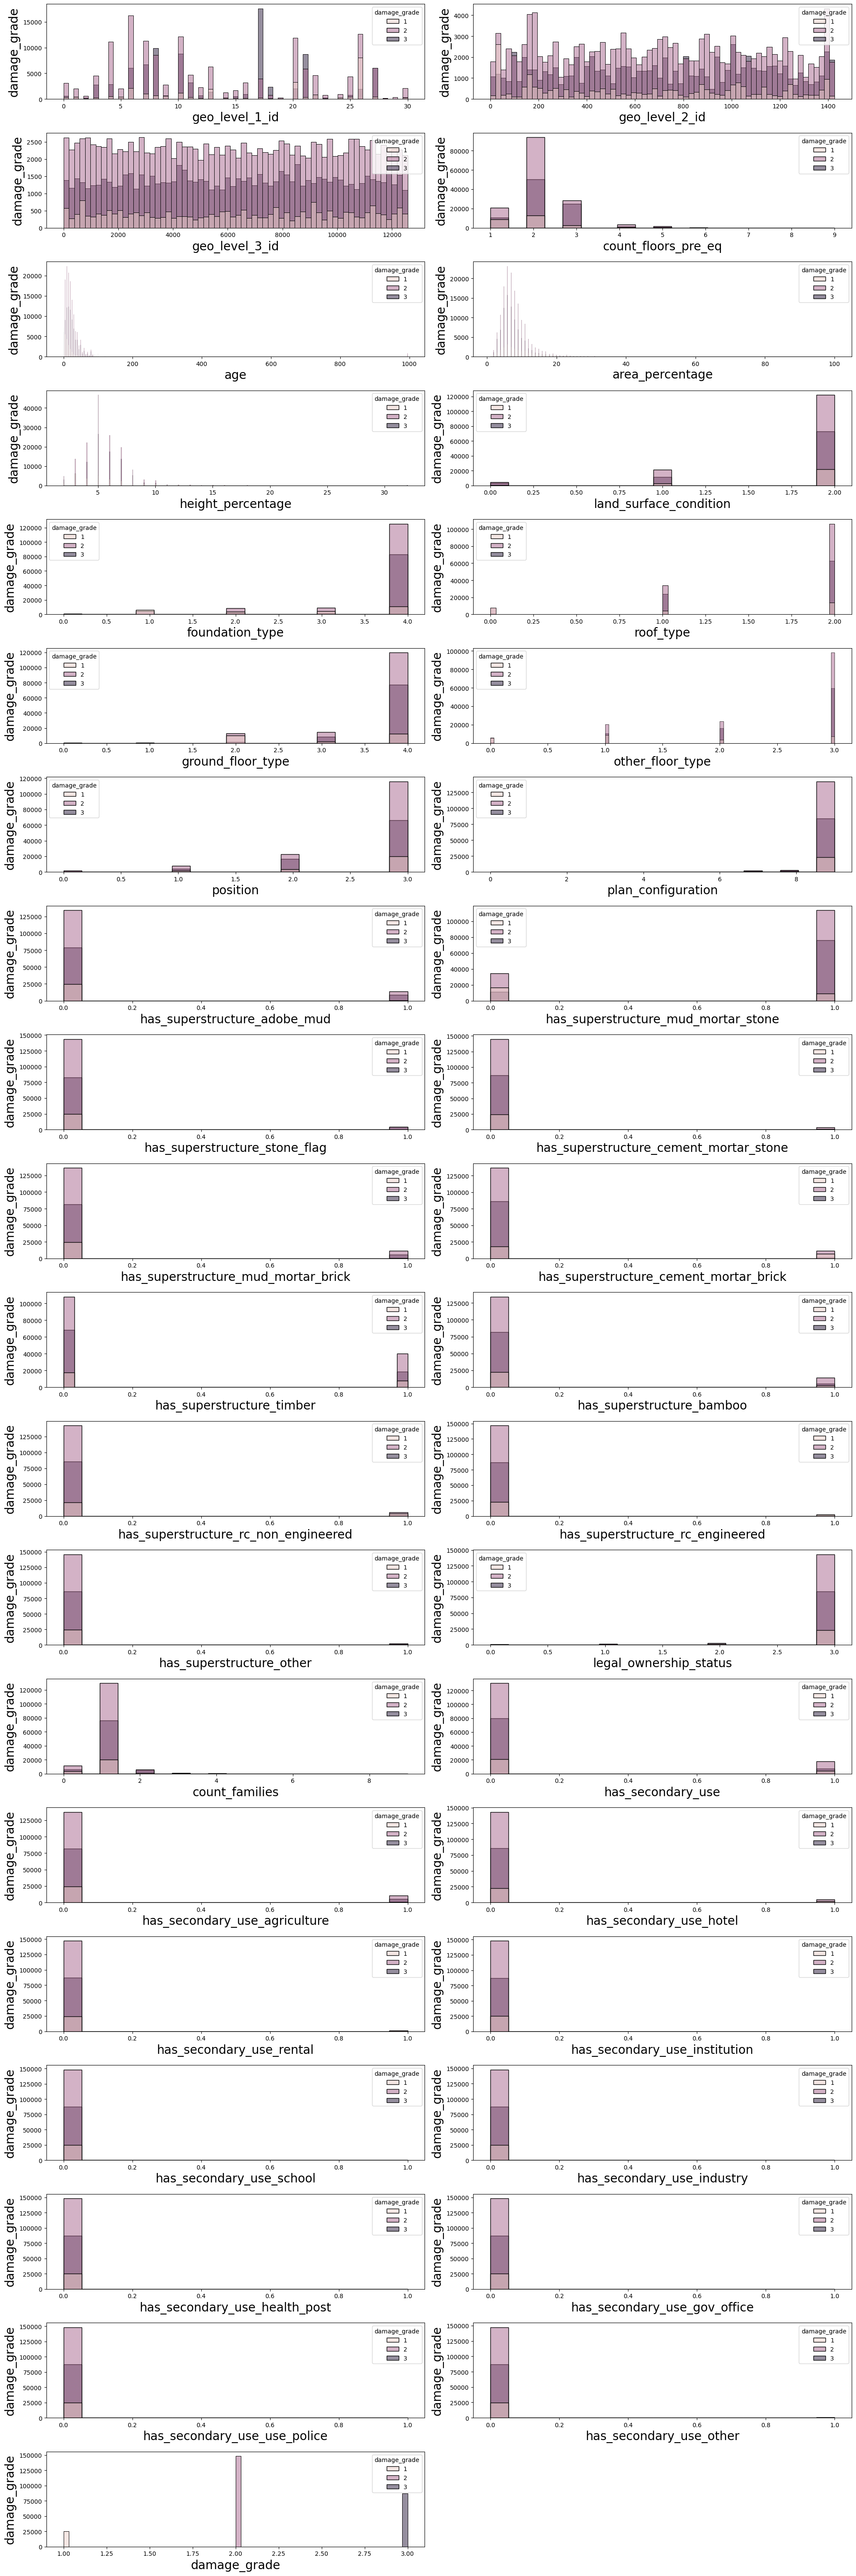

In [230]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=40:
        ax=plt.subplot(20,2,plotnumber)
        sns.histplot(x=data[column],hue=data['damage_grade'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('damage_grade',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# In all geographical region the damage is medium
# where the no.of floors are less the damage is low to medium where the no. of floors are more the damage is high
# almost all the oldest buildings were completely destructed
# in the high area percentage the damage is medium
# in the 2nd surface condition the damege is more
# in 4th foundation type the damage is high
# in roof type, floor type and position 0th level has low damage
# in the 9th type of building type configuration the damage is low to medium
# the structure of cement and stone has less damage as compared to mud
# the structure made by timber and bamboo shows more damage
# the superstructure made by rc engineered had less damage as compared to other two types of superstructure
# the legel ownership is more in 3rd class
# the count of families are high in class 1
# less buildings are used for secondary uses
# the building used for agriculture is less
# the most of the buildings are used for hotel, school, for rental purpose, gov.office, industries, institution, heathpost,and other uses etc.
# overall in all circumstances the damage grade is medium, but in some cases the damage is almost destruction.

## Outliers checking

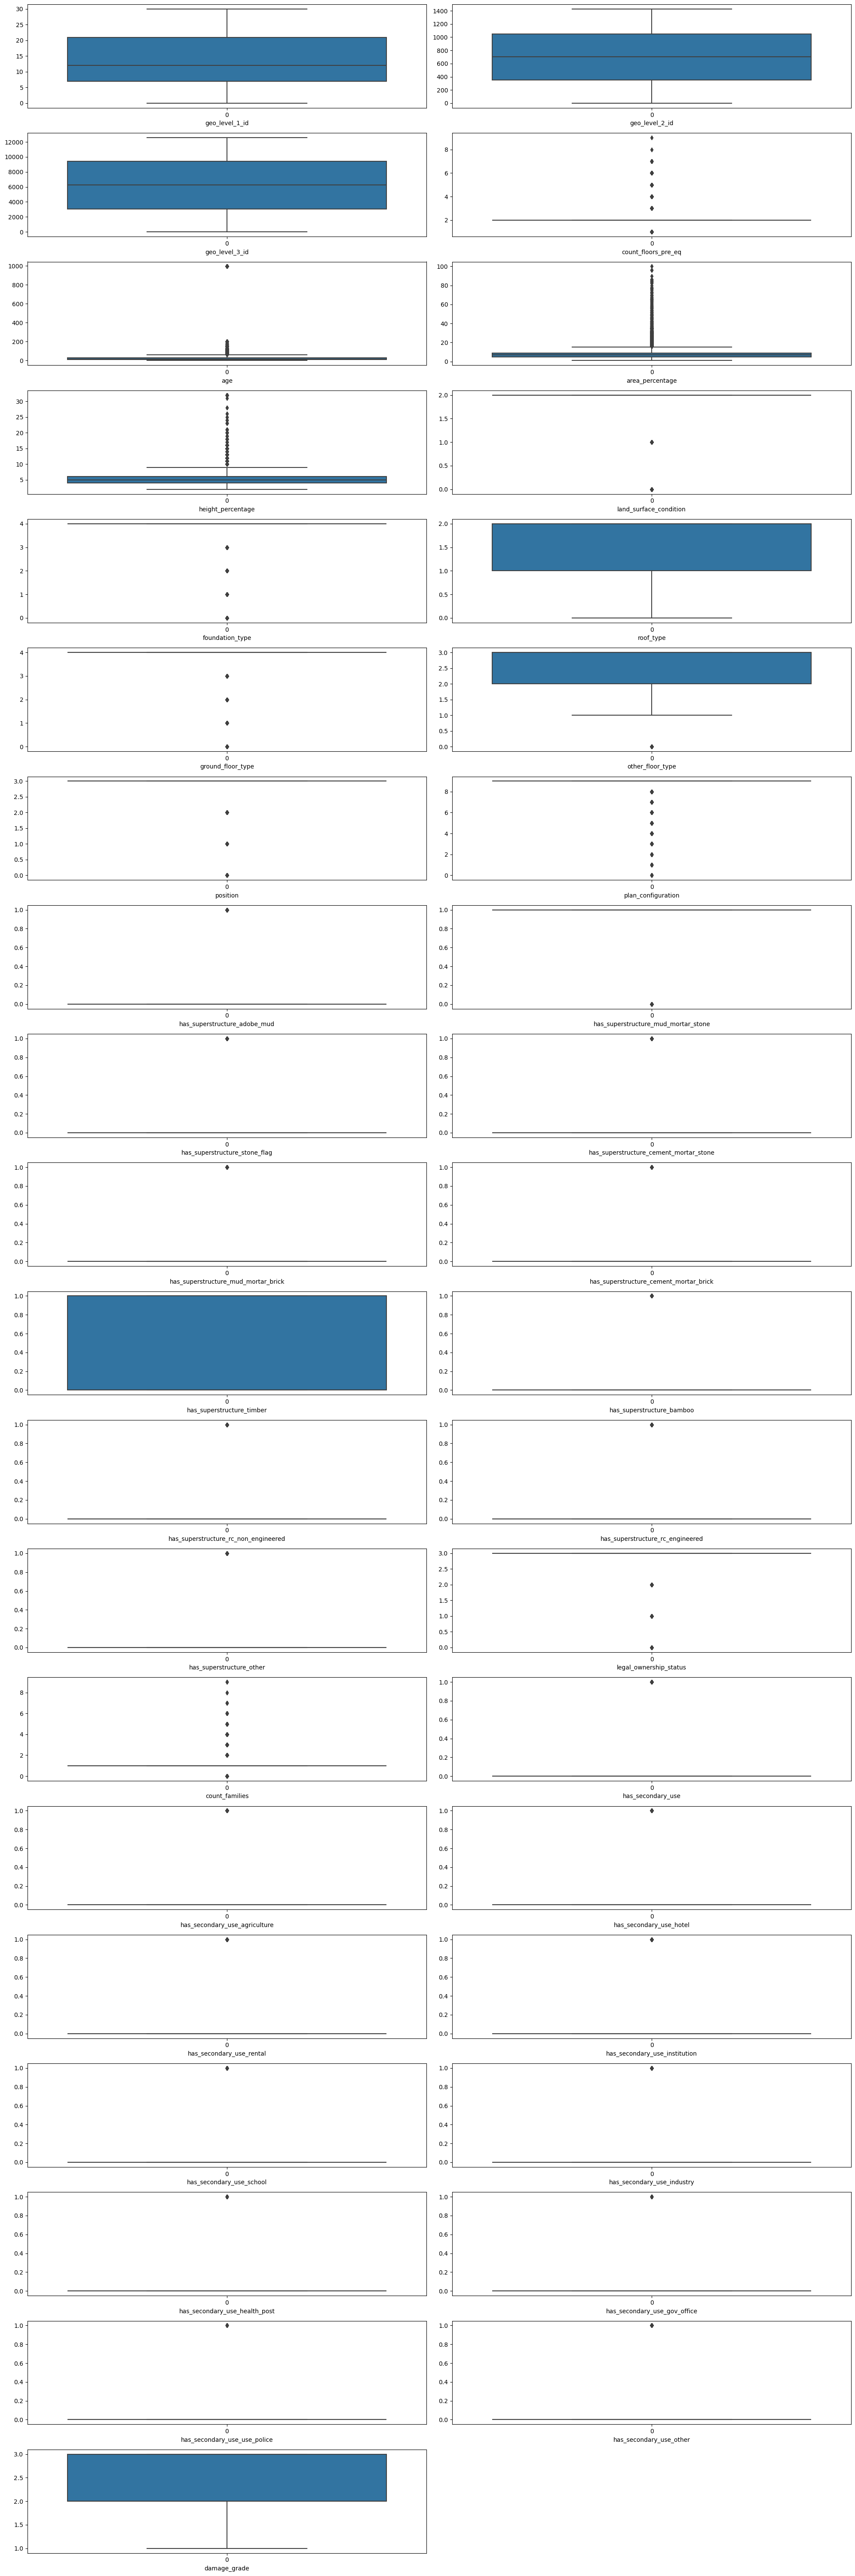

In [34]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=40:
        ax=plt.subplot(20,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    
    
    plotnumber+=1
plt.tight_layout()

## Outliers handling

In [33]:
#we will handle the outliers of only that numericals coloumns which consist ouliers less than 5%.
#the outliers more than 5% is considered as part of our data.

In [110]:
from scipy import stats

### area_percentage

In [111]:
IQR = stats.iqr(data.area_percentage, interpolation='midpoint')
IQR

4.0

In [112]:
Q1= data.area_percentage.quantile(0.25)

Q2= data.area_percentage.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q2 + 1.5*IQR

In [113]:
max_limit

15.0

In [114]:
min_limit

-1.0

In [115]:
data.loc[data['area_percentage'] > max_limit]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
19,8,41,6024,2,20,16,4,2,4,2,4,2,3,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
29,27,548,1119,3,60,27,10,2,4,2,4,3,2,6,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
42,17,1030,1525,3,70,16,7,2,4,2,4,3,3,9,0,1,0,0,0,0,1,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
63,7,1356,11548,1,0,16,2,2,4,2,2,1,3,9,0,1,0,0,0,0,1,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
71,26,39,10795,1,0,17,3,2,1,0,2,1,3,9,0,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260520,26,39,9133,1,10,17,3,2,1,0,2,1,3,9,0,0,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1
260564,5,940,3859,2,0,16,7,2,4,2,4,2,3,9,0,1,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
260582,20,385,1686,1,5,27,3,2,1,1,2,1,3,9,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
260585,6,744,10556,2,45,17,5,2,4,2,4,2,2,9,0,1,0,0,0,0,1,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2


In [116]:
data.loc[data['area_percentage'] < min_limit]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade


In [117]:
data.loc[data['area_percentage'] > max_limit,'area_percentage']=np.median(data.area_percentage)

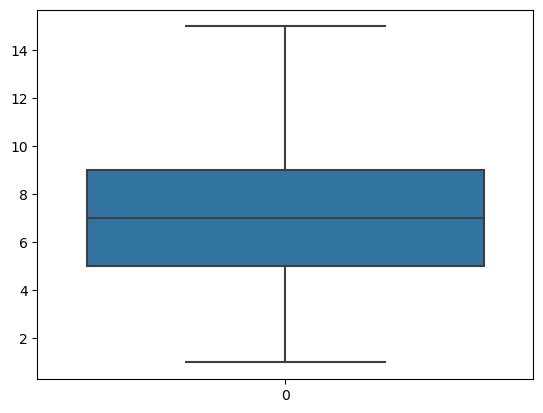

In [118]:
sns.boxplot(data.area_percentage)
plt.show()

### height_percentage

In [119]:
IQR = stats.iqr(data.height_percentage, interpolation='midpoint')
IQR

2.0

In [120]:
Q1= data.height_percentage.quantile(0.25)

Q2= data.height_percentage.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q2 + 1.5*IQR

In [121]:
max_limit

9.0

In [122]:
min_limit

1.0

In [123]:
data.loc[data['height_percentage'] < min_limit]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade


In [124]:
data.loc[data['height_percentage'] > max_limit]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
29,27,548,1119,3,60,7,10,2,4,2,4,3,2,6,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
113,3,1387,8014,5,30,6,10,2,4,2,4,3,0,9,0,0,0,0,1,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
120,3,1387,8014,5,60,3,10,2,4,1,4,3,1,9,0,0,0,0,1,0,0,0,0,0,0,3,1,1,0,1,0,0,0,0,0,0,0,0,2
144,26,110,7692,3,55,11,10,2,4,2,4,3,2,9,0,1,0,0,0,0,1,1,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
187,17,721,6677,3,20,2,32,2,4,2,4,3,2,9,0,1,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260480,11,883,2822,5,80,11,10,2,4,2,4,3,1,9,0,0,0,0,1,1,1,0,0,0,0,3,1,1,0,1,0,0,0,0,0,0,0,0,2
260492,11,660,4377,4,50,4,10,2,4,2,4,3,0,9,0,0,0,0,1,0,1,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2
260545,10,603,12101,3,0,13,10,1,1,0,2,0,3,9,0,0,0,0,0,1,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1
260589,6,673,12181,3,15,11,11,2,1,0,2,0,3,9,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [125]:
data.loc[data['height_percentage'] > max_limit,'height_percentage']=np.median(data.height_percentage)

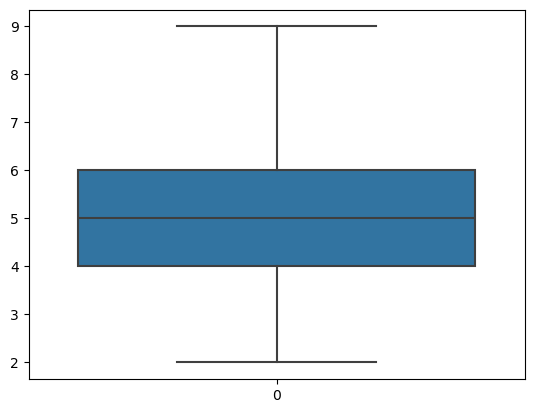

In [126]:
sns.boxplot(data.height_percentage)
plt.show()

### HeatMap for checking correlation between variables

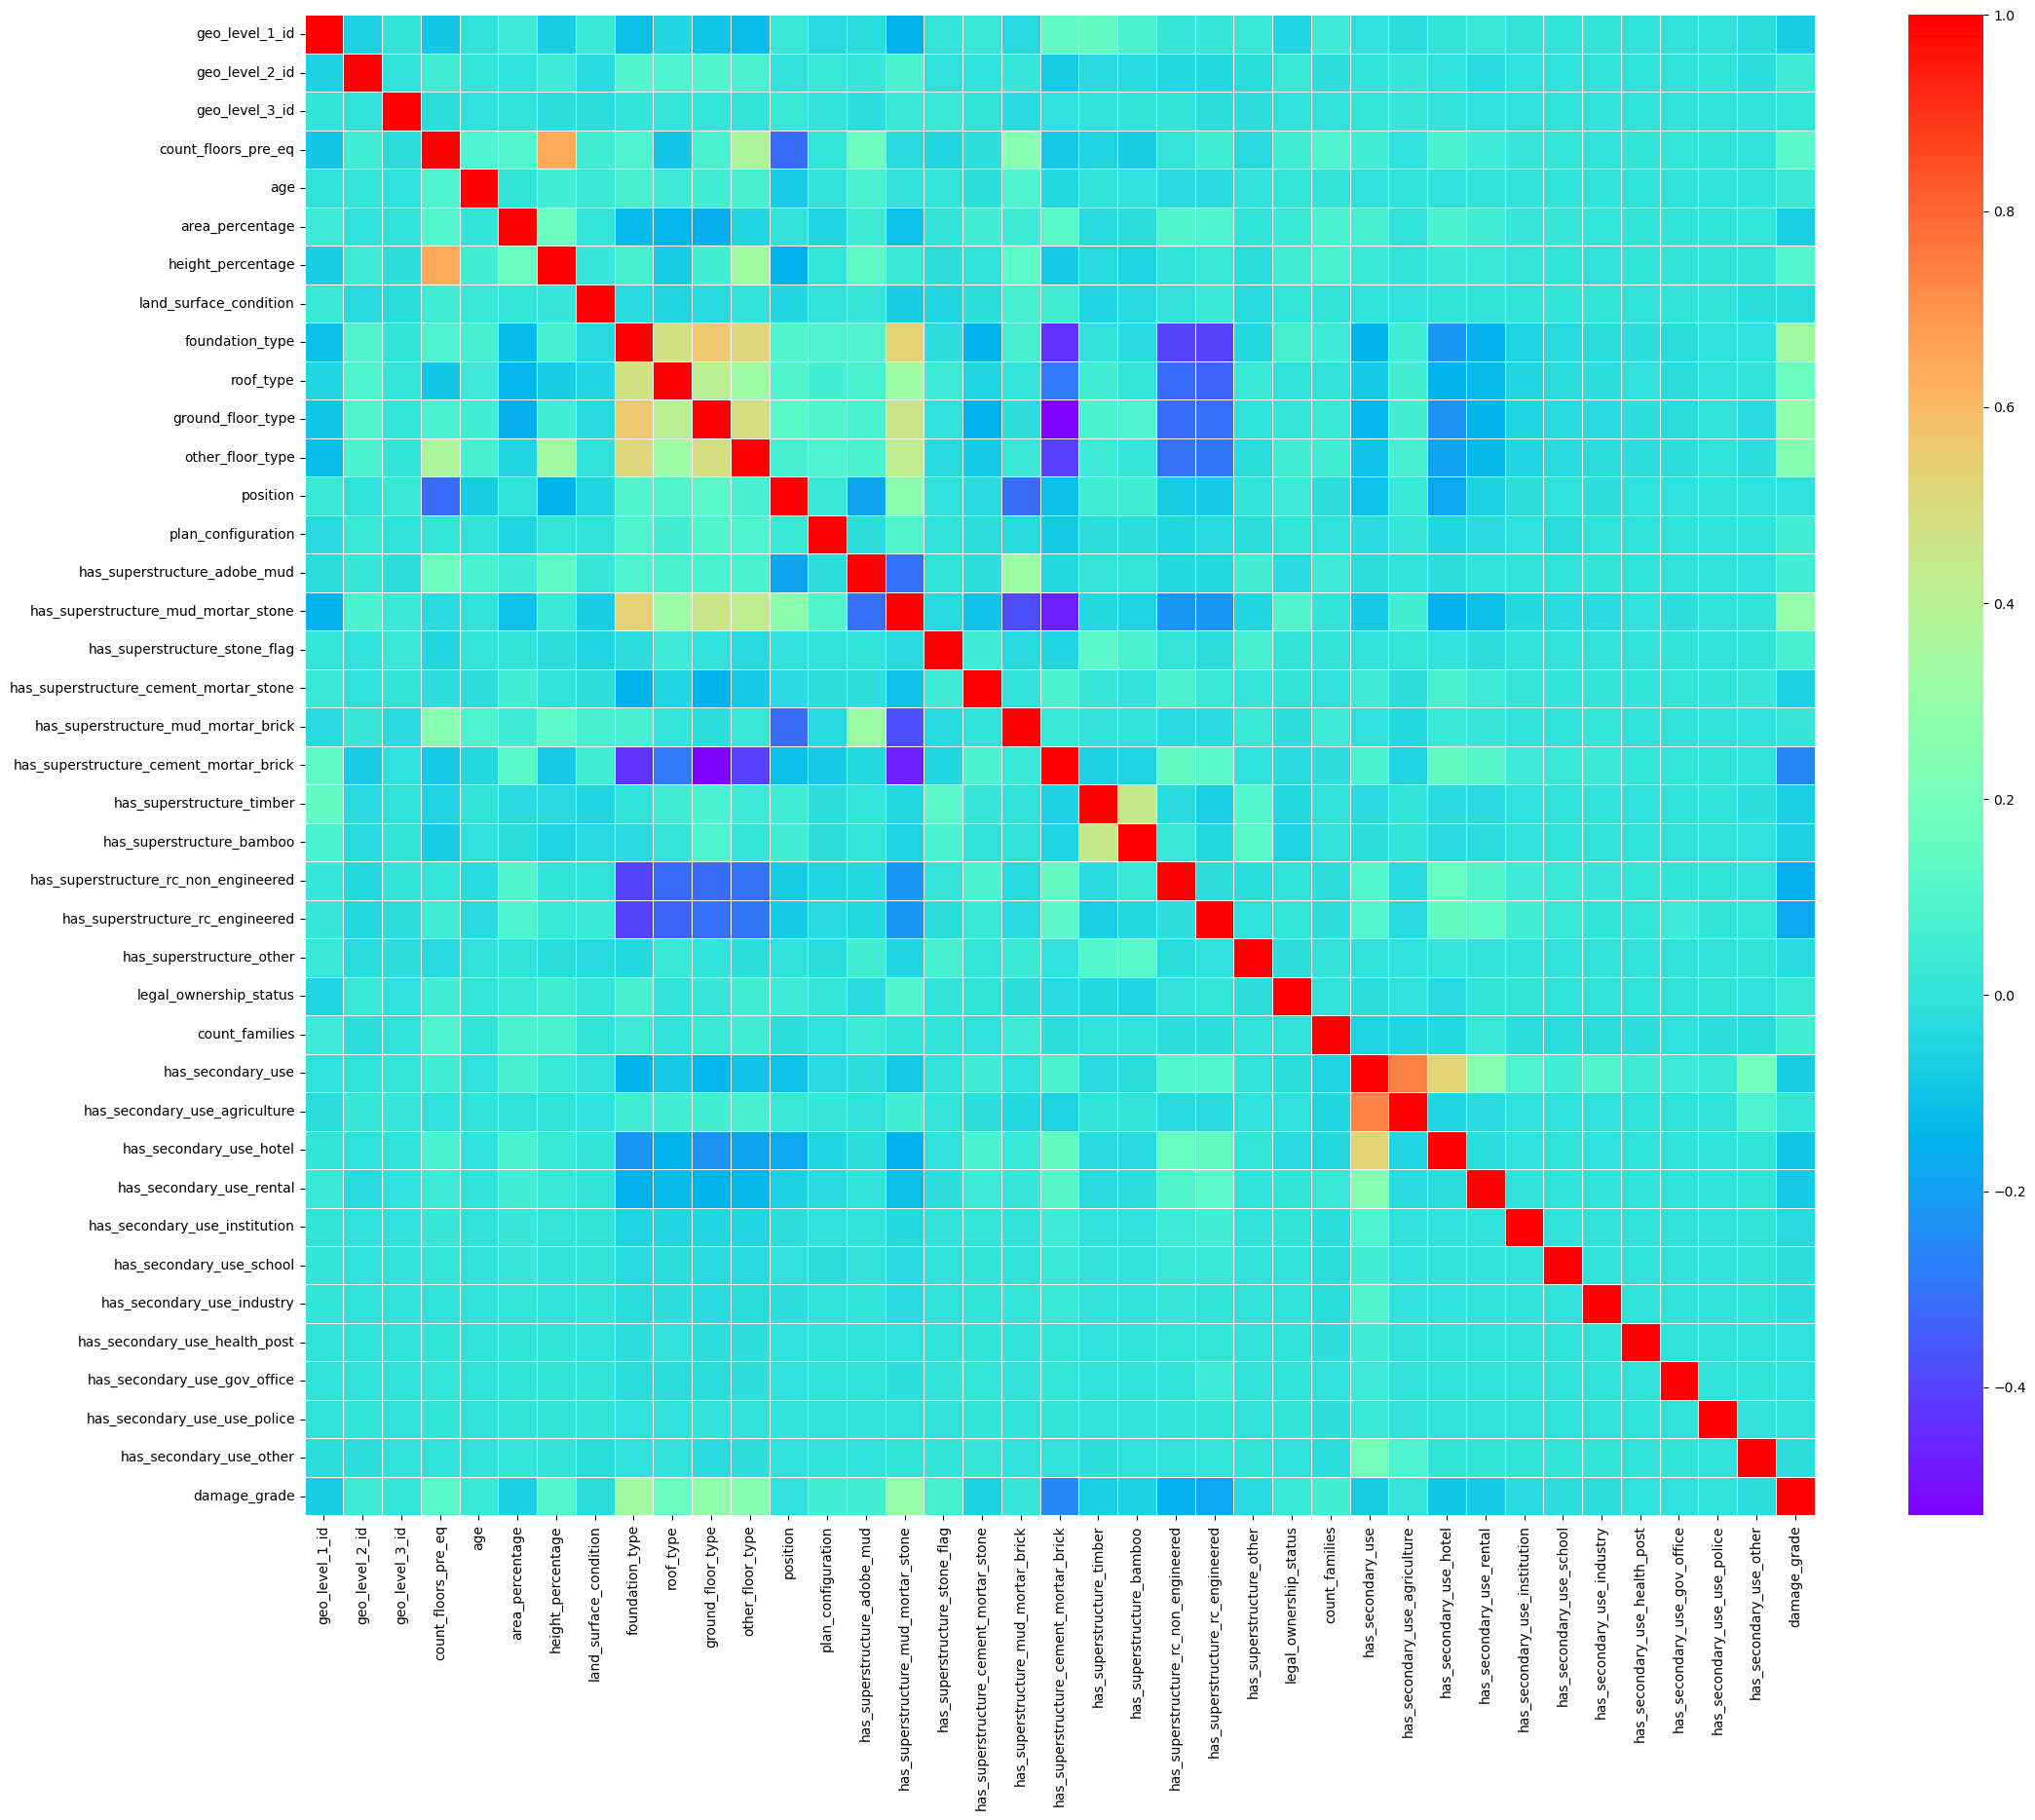

In [52]:
plt.subplots(figsize = (25,20))
sns.heatmap(data.corr(),cmap='rainbow',linewidths=.5)
plt.show()

In [ ]:
# There are no multi-colinearity found in given features, so won't drop any columns.

## Data seperation into independant variables(x), and dependant i.e target variable(y)

In [127]:
x=data.drop('damage_grade',axis=1)
y= data['damage_grade']

In [128]:
x.shape

(260601, 38)

In [129]:
y

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

In [130]:
y.shape

(260601,)

## Data Scaling

In [55]:
# to avoid machine baised towards higher values we will do scaling so data will be in range of 0 to 1
# we will use MinMaxScalar() techniques as our data is skewed data.

In [131]:
sc=MinMaxScaler()
x_Scaled = sc.fit_transform(x)

In [132]:
x_Scaled

array([[0.2       , 0.3412754 , 0.97063738, ..., 0.        , 0.        ,
        0.        ],
       [0.26666667, 0.63069376, 0.22376064, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.25437982, 0.71401289, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.56666667, 0.03573931, 0.64955837, ..., 0.        , 0.        ,
        0.        ],
       [0.86666667, 0.02733006, 0.14729052, ..., 0.        , 0.        ,
        0.        ],
       [0.7       , 0.00630694, 0.7241983 , ..., 0.        , 0.        ,
        0.        ]])

In [133]:
x=pd.DataFrame(x_Scaled,columns=x.columns)

In [134]:
x

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0.200000,0.341275,0.970637,0.125,0.030151,0.357143,0.428571,1.0,1.0,1.0,1.00,1.000000,0.666667,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.266667,0.630694,0.223761,0.125,0.010050,0.500000,0.714286,0.0,1.0,1.0,0.75,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.700000,0.254380,0.714013,0.125,0.010050,0.285714,0.428571,1.0,1.0,1.0,1.00,0.666667,0.666667,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.733333,0.292922,0.850959,0.125,0.010050,0.357143,0.428571,1.0,1.0,1.0,1.00,0.666667,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.366667,0.091801,0.118405,0.250,0.030151,0.500000,1.000000,1.0,1.0,1.0,1.00,0.666667,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,0.833333,0.935529,0.128989,0.000,0.055276,0.357143,0.142857,0.5,1.0,1.0,1.00,0.333333,1.000000,0.888889,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260597,0.566667,0.501051,0.163921,0.125,0.000000,0.357143,0.428571,1.0,1.0,1.0,1.00,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260598,0.566667,0.035739,0.649558,0.250,0.055276,0.357143,0.714286,1.0,1.0,0.5,1.00,1.000000,1.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260599,0.866667,0.027330,0.147291,0.125,0.010050,0.928571,0.571429,1.0,1.0,0.0,0.50,0.000000,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Balancing : SMOTE

In [116]:
# to avoid machine biased towards the majority class, which can lead to poor performance on the minority class,we will apply SMOTE techniques
#on target variable

In [135]:
# apply the smoting to balanced the data.

from collections import Counter 
from imblearn.over_sampling import SMOTE
smote=SMOTE()
print(Counter(y))
x_smt,y_smt=smote.fit_resample(x,y)
print(Counter(y_smt))

Counter({2: 148259, 3: 87218, 1: 25124})
Counter({3: 148259, 2: 148259, 1: 148259})


## Data split

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smt,y_smt,test_size=0.2,random_state=30)

In [137]:
x_train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
64786,0.366667,0.801682,0.044800,0.125000,0.010050,0.500000,0.571429,1.000000,0.50,1.0,1.00,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339772,0.233542,0.110181,0.738308,0.249609,0.000031,0.570982,0.286607,0.501563,0.25,0.0,0.50,0.998958,0.667709,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94870,0.900000,0.384022,0.769714,0.250000,0.005025,0.428571,0.857143,1.000000,0.25,0.0,0.50,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90526,0.833333,0.035039,0.317021,0.125000,0.020101,0.642857,0.428571,0.500000,1.00,0.5,1.00,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
356322,0.300000,0.311843,0.016153,0.000000,0.015343,0.142857,0.142857,1.000000,1.00,1.0,1.00,0.333333,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.684431,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328599,0.846328,0.057725,0.900338,0.125000,0.000000,0.349879,0.428571,0.500000,0.75,1.0,1.00,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.111111,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46220,0.300000,0.469516,0.489536,0.125000,0.030151,0.285714,0.428571,1.000000,1.00,1.0,1.00,1.000000,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
360948,0.743917,0.634054,0.208765,0.125000,0.034485,0.340893,0.396072,0.500000,1.00,1.0,1.00,0.924168,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.484998,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48045,0.200000,0.878066,0.772499,0.125000,0.080402,0.142857,0.857143,1.000000,1.00,1.0,0.75,1.000000,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
y_train

64786     2
339772    1
94870     1
90526     1
356322    1
         ..
328599    1
46220     2
360948    1
48045     2
431909    3
Name: damage_grade, Length: 355821, dtype: int64

In [139]:
x_test.shape

(88956, 38)

In [140]:
y_test.shape

(88956,)

# Model Creation

## Model 1- Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
lr_multi=LogisticRegression()
lr_multi.fit(x_train,y_train)


LogisticRegression()

In [142]:
y_test_pred=lr_multi.predict(x_test)
y_test_pred

array([2, 3, 3, ..., 3, 3, 3], dtype=int64)

In [143]:
y_test

426353    3
411286    3
275239    1
400579    3
382040    1
         ..
198382    3
426178    3
129256    2
78607     2
39939     2
Name: damage_grade, Length: 88956, dtype: int64

In [144]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [145]:
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[19619,  4274,  5547],
       [ 4859, 10430, 14491],
       [ 1495,  7723, 20518]], dtype=int64)

In [146]:
# accuracy check for testing data
accuracy=accuracy_score(y_test, y_test_pred)
print('Accuracy=', accuracy)

Accuracy= 0.5684495705742164


In [147]:
f1=f1_score(y_test,y_test_pred,average='weighted')
print('f1 score=',f1)

f1 score= 0.5632578532254817


## Model 2- Desicion Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier()#object creation for decision tree  

dt.fit(x_train,y_train)#training the model


DecisionTreeClassifier()

In [78]:
y_test_pred=dt.predict(x_test)#prediction with x_test
y_test_pred

array([3, 3, 1, ..., 2, 2, 2], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix#importing mertics to check model performance
##Testing score
y_test_pred=dt.predict(x_test)#passing x_test to predict Y_test
acc_test=accuracy_score(y_test,y_test_pred)#checking accuracy
acc_test

0.7585772741580107

In [80]:
f1=f1_score(y_test,y_test_pred, average='macro')#f1 score
f1

0.7586051621591435

In [81]:
print(classification_report(y_test,y_test_pred))# for  testing

              precision    recall  f1-score   support

           1       0.86      0.87      0.86     29440
           2       0.69      0.69      0.69     29780
           3       0.72      0.72      0.72     29736

    accuracy                           0.76     88956
   macro avg       0.76      0.76      0.76     88956
weighted avg       0.76      0.76      0.76     88956



### Hyperparameter tunning for Decision Tree

In [82]:
from sklearn.model_selection import RandomizedSearchCV
#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set.
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [83]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #used to measure the purity of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth/height of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,
    #we are passing list which is range from 1 to 19
}

In [92]:
tree_clf = DecisionTreeClassifier(random_state=25)#object creation for decision tree with random state 30
tree_cv = RandomizedSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.it is used to print messages
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods/cross validation

tree_cv.fit(x_smt,y_smt)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best paramters: {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 19, 'criterion': 'gini'})


In [93]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=19,min_samples_leaf=4 ,min_samples_split=2,splitter='best')#passing best parameter to decision tree
dt1.fit(x_smt,y_smt)#traing model with best parameter
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([3, 3, 1, ..., 2, 2, 2], dtype=int64)

In [94]:
# predicting training data to check training performance
y_train_predict=dt1.predict(x_smt)
y_train_predict

array([3, 2, 3, ..., 3, 2, 3], dtype=int64)

In [95]:
acc_test=accuracy_score(y_test,y_hat1)
acc_test

0.8103444399478393

## Model 3- Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train) 

RandomForestClassifier()

In [170]:
y_train_pred=random_forest.predict(x_train)

accuracy= accuracy_score(y_train,y_train_pred)
print('accuracy score : ',accuracy)

f1_score= f1_score(y_train,y_train_pred, average='weighted')
print('f1_score : ',f1_score)

accuracy score :  0.991953819476647
f1_score :  0.9919535370335658


In [172]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

random_forest = RandomForestClassifier(n_estimators=100,random_state=40)

random_forest.fit(x_test,y_test)

y_test_pred = random_forest.predict(x_test)

accuracy = accuracy_score(y_test,y_test_pred)
print('accuracy score : ',accuracy)

f1_score = f1_score(y_test,y_test_pred, average='weighted')
print('f1_score : ',f1_score)

accuracy score :  0.997032240658303
f1_score :  0.9970320229211258


## Model 4- MLP

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
mlp = MLPClassifier()
mlp_model = mlp.fit(x_train,y_train)
mlp_model

MLPClassifier()

In [ ]:

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

# accuracy check for both training and testing data
accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred)

(0.6730294164762619, 0.6684990332299114)

## Model Comparison

In [148]:
dfr = pd.DataFrame()
dfr['Model'] = ['LogisticRegression','MLP','Decision tree with Hyperparameters', 'Random Forest']
dfr['Accuracy'] = [0.57, 0.67, 0.81, 0.99]
dfr

,Model,Accuracy
0,LogisticRegression,0.57
1,MLP,0.67
2,Decision tree with Hyperparameters,0.81
3,Random Forest,0.99


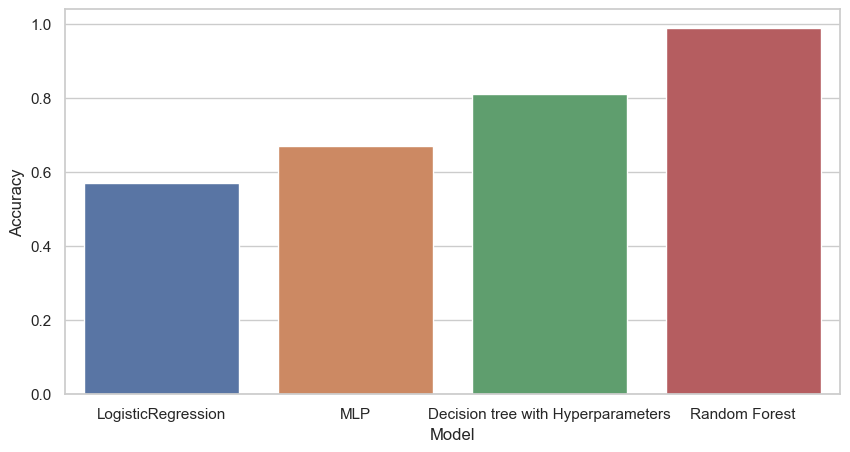

In [150]:
# coparision using graph
plt.figure(figsize=(10,5))
sns.set(style= 'whitegrid')
ax=sns.barplot(x='Model',y='Accuracy',data=dfr)

# **Conclusion**:-

### Random Forest Model is giving best accuracy,so it is a Best fit model for this dataset.

## *Suggestions to Seismologists*:

#### For seismologists working on an ML project focused on earthquake damage prediction, several suggestions can help improve the accuracy and effectiveness of the models, ultimately leading to better mitigation strategies and reduced damage. Here are some key recommendations:

####  Data Collection and Preprocessing:

High-Quality Data: Ensure the collection of high-quality, comprehensive datasets that include geological, structural, and environmental factors. This can include data on soil composition, building materials, construction methods, and historical earthquake data.

Data Cleaning: Perform thorough data cleaning to handle missing values, remove duplicates, and correct errors, handle the outliers. 

#### Model Selection and Training:
Algorithm Selection: Experiment with various machine learning algorithms, including random forests, neural networks, and ensemble methods, to find the best fit for your data.

Hyperparameter Tuning: Use techniques like GridSearchCV or RandomizedSearchCV to fine-tune hyperparameters for optimal model performance.

Cross-Validation: Employ robust cross-validation techniques to ensure that the model generalizes well to unseen data.

#### Handling Imbalanced Data:
Resampling Techniques: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance if the dataset has significantly more instances of non-damage compared to damage.

#### Evaluation and Metrics:
Appropriate Metrics: Choose evaluation metrics that reflect the real-world impact, such as precision, recall, F1-score, rather than just accuracy.

#### Continuous Improvement:
Model Updating: Regularly update the model with new data and insights to maintain its accuracy and relevance.
Feedback Loop: Implement a feedback loop where the performance of the model in real earthquake events is analyzed, and lessons learned are used to improve the model.
